In [1]:
import tensorflow as tf
import numpy as np
import importlib.util
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def load_module(path):
    spec = importlib.util.spec_from_file_location("module.name", path)
    module = importlib.util.module_from_spec(spec)
    spec.loader.exec_module(module)
    return module

def load_arch(arch_path):
    arch = load_module(arch_path)
    nn = arch.CNN()

    g = tf.Graph()
    with g.as_default():
        nn.create_architecture()
    return g, nn

In [3]:
graph, nn = load_arch("arch_invariant_h.py")

In [4]:
sess = tf.Session(graph=graph)

In [5]:
sess.run(tf.variables_initializer(graph.get_collection(tf.GraphKeys.GLOBAL_VARIABLES)))

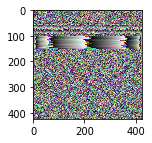

In [6]:
x = np.random.normal(size=(424, 424, 3))
x[50:100, :, :]  = np.sort(x[50:100, :, :], 0)
x[100:150, :, :] = np.sort(x[100:150, :, :], 1)
x[150:200, :, :] = np.sort(x[150:200, :, :], 2)
plt.figure(figsize=(2,2))
plt.imshow(x)

In [7]:
def dihedral(x, i):
    x = x.copy()
    if i & 4:
        x = np.transpose(x, (1, 0, 2))  # tau[4]
    if i & 1:
        x = x[:, ::-1, :]  # tau[1]
    if i & 2:
        x = x[::-1, :, :]  # tau[2]
    return x

In [8]:
xs = np.array([dihedral(x, i) for i in range(8)])

In [9]:
ps = sess.run(nn.tfp, feed_dict={nn.tfx: xs, nn.tfacc: 0.5})
print(np.transpose(ps))

[[ 0.12871927  0.12872721  0.12872624  0.12872408  0.12872282  0.12872097
   0.12872601  0.12872827]
 [ 0.78388423  0.78387541  0.78387278  0.78387767  0.78388059  0.7838822
   0.78387332  0.78387159]
 [ 0.0873965   0.08739749  0.08740097  0.08739826  0.08739663  0.08739677
   0.08740066  0.08740012]
 [ 0.34354579  0.34355453  0.34353876  0.34353957  0.34354582  0.34354553
   0.3435418   0.34354445]
 [ 0.44033846  0.44032088  0.44033405  0.4403381   0.44033468  0.44033667
   0.44033149  0.44032717]
 [ 0.28667015  0.28666291  0.28666753  0.28667182  0.28666678  0.28667021
   0.28666666  0.28666702]
 [ 0.15366833  0.15365796  0.1536665   0.15366629  0.15366787  0.15366648
   0.1536648   0.15366016]
 [ 0.40425435  0.40423957  0.40425172  0.40425417  0.40425119  0.40425283
   0.40424815  0.40424523]
 [ 0.03608412  0.03608133  0.03608235  0.03608393  0.0360835   0.03608385
   0.03608332  0.03608197]
 [ 0.08031508  0.08031406  0.08031552  0.08031715  0.08031496  0.08031499
   0.08031245  0.0

In [10]:
test = sess.run(nn.test, feed_dict={nn.tfx: xs})
test = np.reshape(test, (8, 8, -1))

(0.12035695, 1.725794)

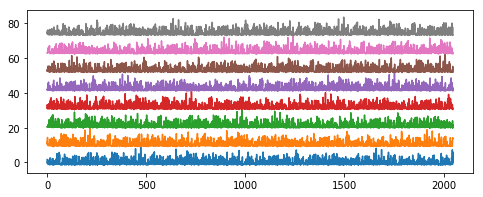

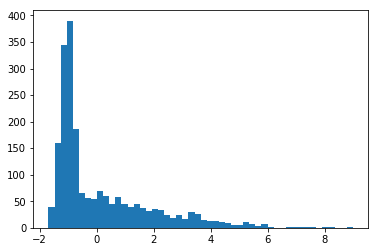

In [11]:
step = test[0].max() - test[0].min()
plt.figure(figsize=(8,3))
for i in range(8):
    plt.plot(test[i].flatten() + step * i)

plt.figure()
plt.hist(test[0].flatten(), bins=50)

test[0].flatten().mean(), test[0].flatten().std()

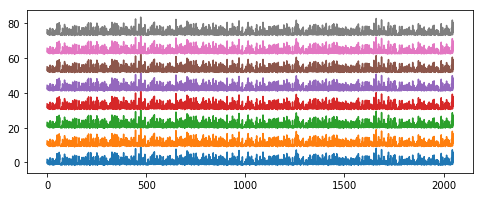

In [12]:
mt = np.array([ [0, 1, 2, 3, 4, 5, 6, 7], [1, 0, 3, 2, 5, 4, 7, 6],
                [2, 3, 0, 1, 6, 7, 4, 5], [3, 2, 1, 0, 7, 6, 5, 4],
                [4, 6, 5, 7, 0, 2, 1, 3], [5, 7, 4, 6, 1, 3, 0, 2],
                [6, 4, 7, 5, 2, 0, 3, 1], [7, 5, 6, 4, 3, 1, 2, 0]])
# tau[mt[a,b]] = tau[a] o tau[b]

iv = np.array([0, 1, 2, 3, 4, 6, 5, 7])
# tau[iv[a]] is the inverse of tau[a]

plt.figure(figsize=(8,3))
for i in range(8):
    plt.plot(test[i][mt[i]].flatten() + step * i)